## Task

1. Define a coupled linear system (e.g., predator-prey or coupled tanks).
2. Formulate the matrix form $\dot{\mathbf{x}} = A\mathbf{x}$.
3. Solve numerically for various initial conditions.
4. Plot $x_1(t)$ and $x_2(t)$ on the same graph.

$$
\dot{x} = a_{11}x + a_{12}y \\
\dot{y} = a_{21}x + a_{22}y
$$

$$\mathbf{\dot{x}} = A\mathbf{x}$$

$$
\begin{bmatrix}
\dot{x} \\ \dot{y}
\end{bmatrix}
=
\begin{bmatrix}
a_{11} & a_{12} \\ a_{21} & a_{22}
\end{bmatrix}

\begin{bmatrix}
x \\ y
\end{bmatrix}
$$

To define a coupled linear system, we can consider the predator-prey model, which is a common example in ecology. The equations for the predator-prey model are given by:

$$ \frac{dx}{dt} = ax + by $$
$$ \frac{dy}{dt} = cx + dy $$

Where:
- \( x(t) \) represents the prey population at time \( t \).
- \( y(t) \) represents the predator population at time \( t \).
- \( a x \), \(d y \) represent the natural growth of prey and predators, respectively.
- \( b y \) represents the effect of predators on the prey population (negative impact).
- \( c x \) represents the effect of prey on the predator population (positive impact).

## Algebraic solution

$$ \mathbf{\dot{x}} = A\mathbf{x} $$

Solution guess:

$$ \mathbf{x}(t) = v e^{\lambda t} $$
$$ \mathbf{\dot{x}}(t) = \lambda v e^{\lambda t} $$

Substituting into the original equation:

$$ \lambda v e^{\lambda t} = A v e^{\lambda t} $$
$$ \lambda v = A v $$
$$ (A - \lambda I) v = 0 $$

Matrix transformation:

$$ P = \begin{bmatrix} v_1 & v_2 \end{bmatrix} $$
$$ A = P D P^{-1} $$
$$ x(t) = P u(t) $$

Substituting into the original equation:

$$ \frac{d(Pu)}{dt} = A(Pu) $$
$$ P \frac{du}{dt} = P D P^{-1} P u $$
$$ \frac{du}{dt} = D u; \quad D = \begin{bmatrix} \lambda_1 & 0 \\ 0 & \lambda_2 \end{bmatrix} $$

Decoupling:

$$\dot{u}_1 = \lambda_1 u_1 \implies u_1(t) = c_1 e^{\lambda_1 t}$$
$$\dot{u}_2 = \lambda_2 u_2 \implies u_2(t) = c_2 e^{\lambda_2 t}$$

$$ x(t) = P u(t) = c_1 v_1 e^{\lambda_1 t} + c_2 v_2 e^{\lambda_2 t} $$





In [1]:
# ty: ignore
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import sympy as sp
from numpy.typing import ArrayLike, NDArray

# Define symbols
t = sp.symbols("t")
a, b, c, d = sp.symbols("a b c d", real=True)

x = sp.Function("x")(t)  # ty: ignore[call-non-callable]
y = sp.Function("y")(t)  # ty: ignore[call-non-callable]

ode = (
    sp.Eq(sp.Derivative(x, t), a * x + b * y),
    sp.Eq(sp.Derivative(y, t), c * x + d * y),
)

display(ode)  # ty: ignore[unresolved-reference]

(Eq(Derivative(x(t), t), a*x(t) + b*y(t)),
 Eq(Derivative(y(t), t), c*x(t) + d*y(t)))

In [15]:
a_val, b_val, c_val, d_val = 0.3, -0.5, 0.35, -0.20
subs_dict = {a: a_val, b: b_val, c: c_val, d: d_val}

# Initial conditions must be specified at t=0
initial_conditions = {x.subs(t, 0): 1e3, y.subs(t, 0): 1e2}

t_span = (0, 10)
t_eval = np.linspace(*t_span, 1000)


ode = tuple([eq.subs(subs_dict) for eq in ode])
print(ode)

(Eq(Derivative(x(t), t), 0.3*x(t) - 0.5*y(t)), Eq(Derivative(y(t), t), 0.35*x(t) - 0.2*y(t)))


In [16]:
A = np.array([[a_val, b_val], [c_val, d_val]])
np.linalg.eigvals(A)
u, v = np.linalg.eig(A)

print("Eigenvalues:\n", u)
print("Eigenvectors:\n", v)

Eigenvalues:
 [0.05+0.3354102j 0.05-0.3354102j]
Eigenvectors:
 [[0.76696499+0.j         0.76696499-0.j        ]
 [0.38348249-0.51449576j 0.38348249+0.51449576j]]


### Algebraic solution steps (for completeness, not to be utilized in real code):

Integration constants C: [651.92024052-388.73012632j 651.92024052+388.73012632j]


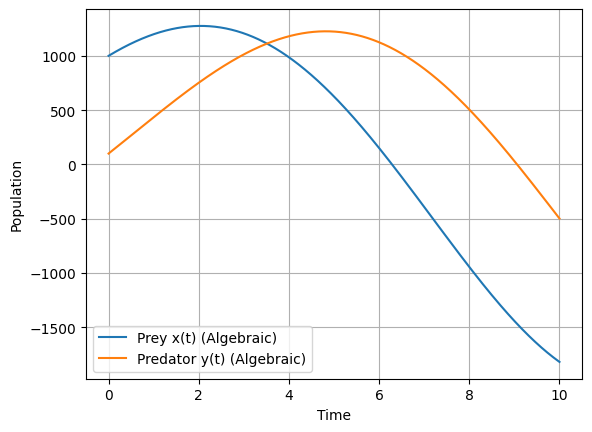

In [ ]:
x0 = np.array([1000, 100])  # Prey, Predator at t=0

C = np.linalg.solve(v, x0)

print(f"Integration constants C: {C}")

x_val_alg = np.zeros_like(t_eval, dtype=np.complex128)
y_val_alg = np.zeros_like(t_eval, dtype=np.complex128)

for i in range(len(u)):
    lambda_i = u[i]
    v_i = v[:, i]
    c_i = C[i]

    mode_contribution = c_i * v_i[:, np.newaxis] * np.exp(lambda_i * t_eval)

    x_val_alg += mode_contribution[0, :]
    y_val_alg += mode_contribution[1, :]

x_val_alg = np.real(x_val_alg)
y_val_alg = np.real(y_val_alg)

plt.figure()
plt.plot(t_eval, x_val_alg, label="Prey x(t) (Algebraic)", linestyle="-")
plt.plot(t_eval, y_val_alg, label="Predator y(t) (Algebraic)", linestyle="-")
plt.xlabel("Time")
plt.ylabel("Population")
plt.legend()
plt.grid(True)
plt.show()

In [4]:
general_solution = sp.dsolve(ode, [x, y])
display(general_solution)  # ty: ignore[unresolved-reference]

[Eq(x(t), (0.714285714285714*C1 - 0.95831484749991*C2)*exp(0.05*t)*cos(0.335410196624968*t) - (0.95831484749991*C1 + 0.714285714285714*C2)*exp(0.05*t)*sin(0.335410196624968*t)),
 Eq(y(t), 1.0*C1*exp(0.05*t)*cos(0.335410196624968*t) - 1.0*C2*exp(0.05*t)*sin(0.335410196624968*t))]

In [5]:
particular_solution = sp.dsolve(ode, [x, y], ics=initial_conditions)
particular_solution = tuple([sp.simplify(sol) for sol in particular_solution])
display(particular_solution)  # ty: ignore[unresolved-reference]

(Eq(x(t), (596.284793999944*sin(0.335410196624968*t) + 1000.0*cos(0.335410196624968*t))*exp(0.05*t)),
 Eq(y(t), (968.962790249909*sin(0.335410196624968*t) + 100.0*cos(0.335410196624968*t))*exp(0.05*t)))

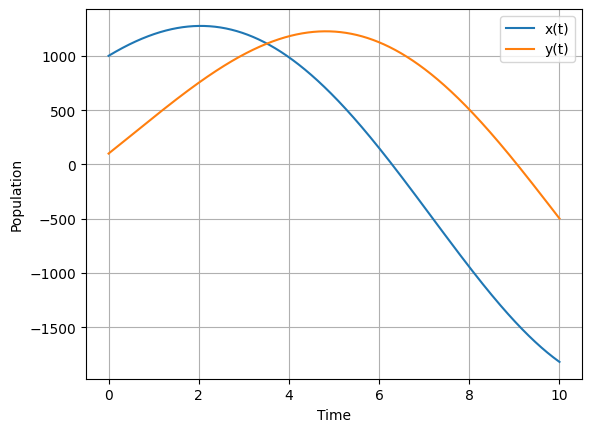

In [19]:
x_lambda = sp.lambdify(t, particular_solution[0].rhs, "numpy")
y_lambda = sp.lambdify(t, particular_solution[1].rhs, "numpy")

x_values = x_lambda(t_eval)
y_values = y_lambda(t_eval)

plt.plot(t_eval, x_values, label="x(t)")
plt.plot(t_eval, y_values, label="y(t)")

plt.xlabel("Time")
plt.ylabel("Population")
plt.legend()
plt.grid(True)
# plt.yscale("log")

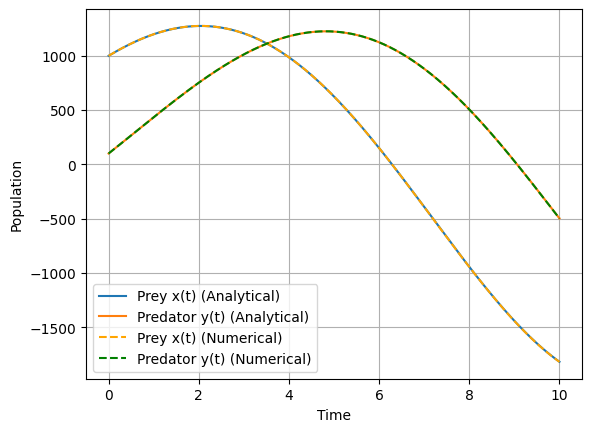

In [24]:
def system_ode(t: float, z: ArrayLike) -> NDArray:
    x, y = z
    dxdt = a_val * x + b_val * y
    dydt = c_val * x + d_val * y
    return np.array([dxdt, dydt])


plt.plot(t_eval, x_values, label="Prey x(t) (Analytical)", linestyle="-")
plt.plot(t_eval, y_values, label="Predator y(t) (Analytical)", linestyle="-")

sol = solve_ivp(system_ode, t_span, [1000, 100], t_eval=t_eval)
plt.plot(sol.t, sol.y[0], label="Prey x(t) (Numerical)", linestyle="--", color="orange")
plt.plot(
    sol.t, sol.y[1], label="Predator y(t) (Numerical)", linestyle="--", color="green"
)
plt.xlabel("Time")
plt.ylabel("Population")
plt.legend()
plt.grid(True)